In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic


In [3]:
df = pd.read_csv("./Java/output/ExpVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,exp,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
0,Gaussian,0.2,-10.0,0.000045,0.992981,-2.8921,5.12039,0.000009,0.000009,8.339800e-07,...,0.0015,0.0019,0.0014,0.0006,0.0001,0.0001,0.0004,0.0002,0.0001,0.0001
1,Gaussian,0.2,-5.0,0.006738,0.992981,-2.8921,5.12039,0.001379,0.001389,1.237740e-04,...,0.0015,0.0019,0.0014,0.0006,0.0001,0.0001,0.0004,0.0002,0.0001,0.0001
2,Gaussian,0.2,-2.0,0.135335,0.992981,-2.8921,5.12039,0.027696,0.027892,2.486060e-03,...,0.0015,0.0019,0.0014,0.0006,0.0001,0.0001,0.0004,0.0002,0.0001,0.0001
3,Gaussian,0.2,-1.0,0.367879,0.992981,-2.8921,5.12039,0.075287,0.075819,6.757810e-03,...,0.0015,0.0019,0.0014,0.0006,0.0001,0.0001,0.0004,0.0002,0.0001,0.0001
4,Gaussian,0.2,0.0,1.000000,0.992981,-2.8921,5.12039,0.204650,0.206097,1.836960e-02,...,0.0015,0.0019,0.0014,0.0006,0.0001,0.0001,0.0004,0.0002,0.0001,0.0001


In [4]:
sorted(df['Noise'].unique())

[0.01, 0.02, 0.05, 0.1, 0.2]

# Deviation vs Uncertainty

In [5]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sorted(df['Noise'].unique()), noiseType='Gaussian',
                sStyle=['+', '-', '--', 'x'], sColor = ['r','g','b','y','c','m'],
                logx=False, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title('e^(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}', markersize=10)
    ax.legend(bbox_to_anchor=(1.1, 1.05))

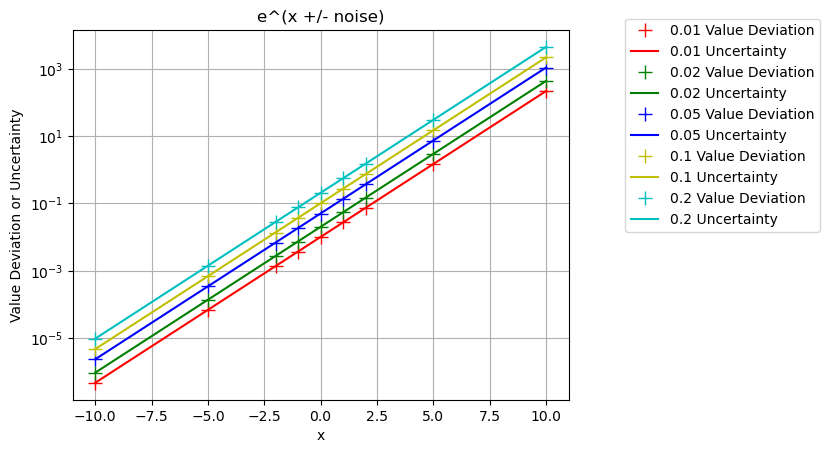

In [6]:
PlotValues()

In [7]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sorted(df['Noise'].unique()),
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    #ax2.set_yscale('log')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.15, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

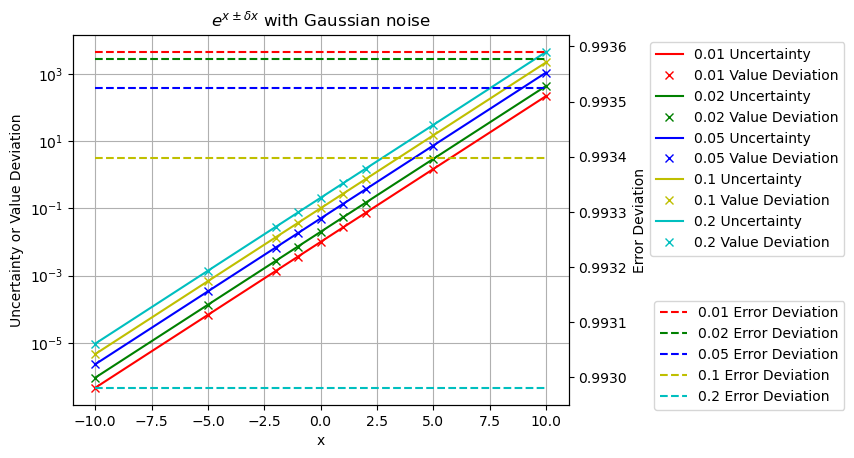

In [8]:
PlotErrorDev()

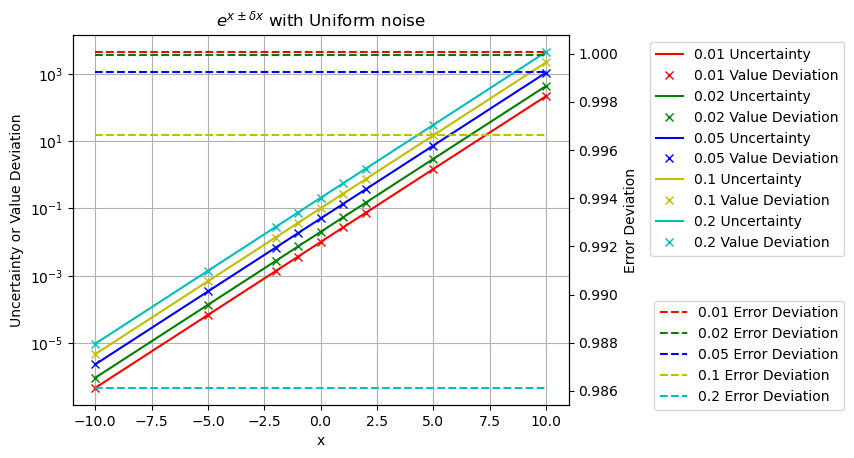

In [9]:
PlotErrorDev('Uniform')

# Mean vs Bias

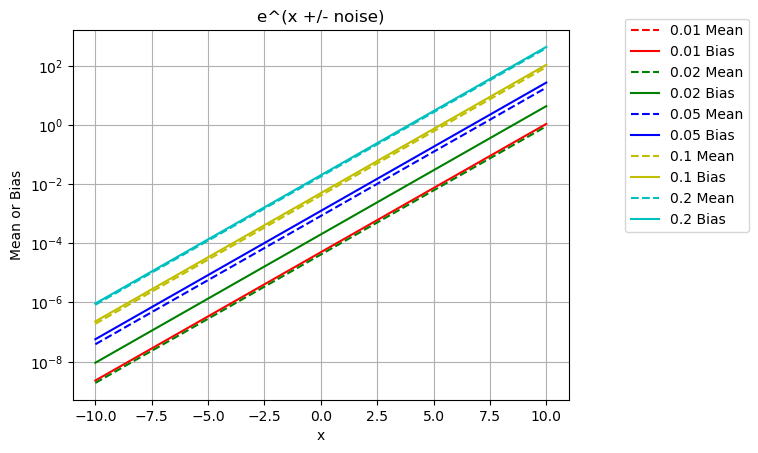

In [10]:
PlotValues(sValue=['Mean', 'Bias'], sStyle=['--', '-'])

# Error Maximum and Minimum

# Histogram

In [11]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.0001,0.0,0.0004,0.0003,0.0022,0.0057,0.0123,0.0236,0.0349,0.0459,...,0.0297,0.025,0.0205,0.0129,0.0106,0.0091,0.0059,0.005,0.0038,0.0022
1,0.0001,0.0,0.0004,0.0003,0.0022,0.0057,0.0123,0.0236,0.0349,0.0459,...,0.0297,0.025,0.0205,0.0129,0.0106,0.0091,0.0059,0.005,0.0038,0.0022
2,0.0001,0.0,0.0004,0.0003,0.0022,0.0057,0.0123,0.0236,0.0349,0.0459,...,0.0297,0.025,0.0205,0.0129,0.0106,0.0091,0.0059,0.005,0.0038,0.0022
3,0.0001,0.0,0.0004,0.0003,0.0022,0.0057,0.0123,0.0236,0.0349,0.0459,...,0.0297,0.025,0.0205,0.0129,0.0106,0.0091,0.0059,0.005,0.0038,0.0022
4,0.0001,0.0,0.0004,0.0003,0.0022,0.0057,0.0123,0.0236,0.0349,0.0459,...,0.0297,0.025,0.0205,0.0129,0.0106,0.0091,0.0059,0.005,0.0038,0.0022


In [12]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


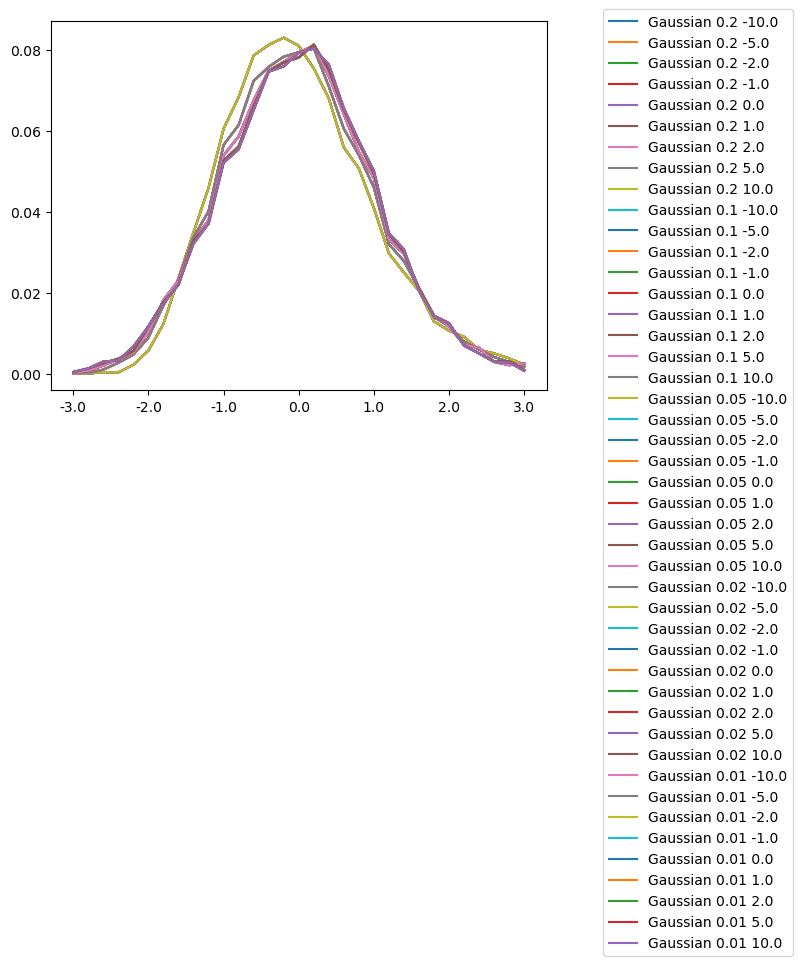

In [13]:
PlotHisto(sNoiseType=['Gaussian'])

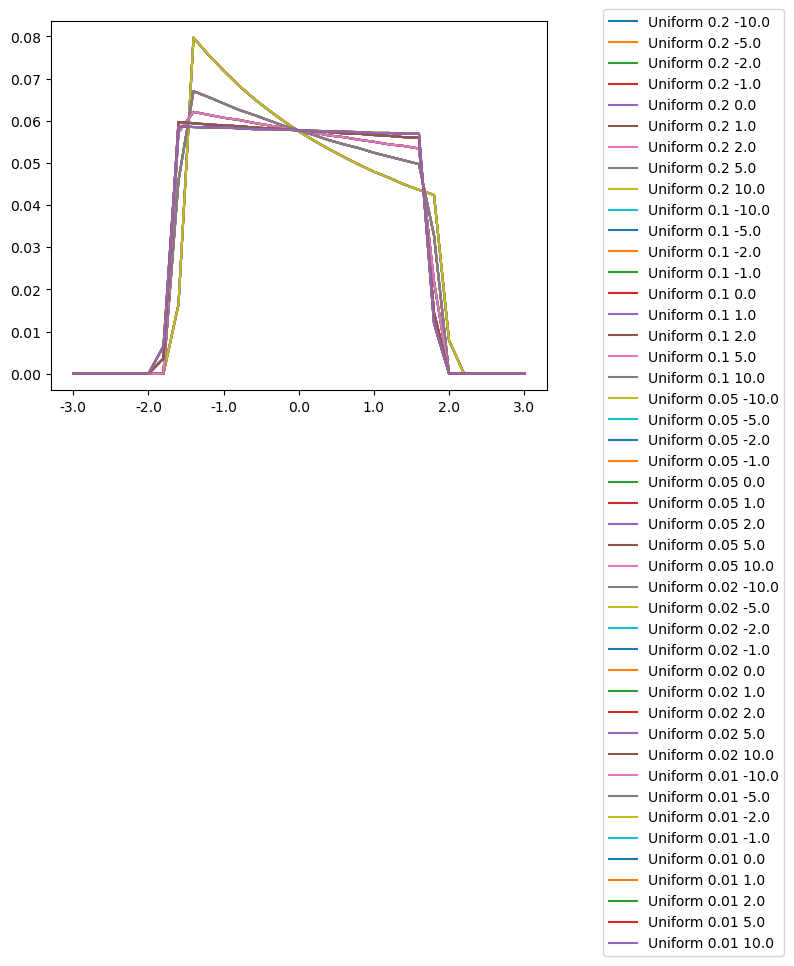

In [14]:
PlotHisto()

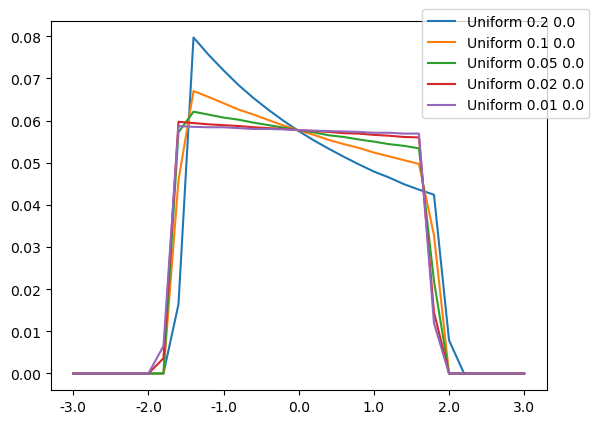

In [15]:
PlotHisto(sX=[0])

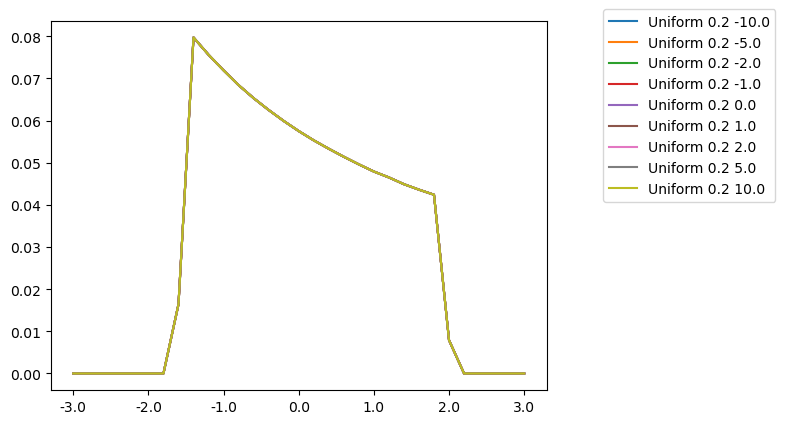

In [16]:
PlotHisto(sNoise=[0.2])